In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Read in the Data
results = pd.read_csv('../CleanData/merge_di.csv')
results.head()

,Year,State,Deaths,Income
0,2017,Alabama,53238.0,40252.0
1,2017,Alaska,4411.0,57278.0
2,2017,Arizona,57758.0,43301.0
3,2017,Arkansas,32588.0,42056.0
4,2017,California,268189.0,58813.0


In [25]:
#Reorder columns 
new_df=results[['Income', 'Deaths']]
new_df

,Income,Deaths
0,40252.0,53238.0
1,57278.0,4411.0
2,43301.0,57758.0
3,42056.0,32588.0
4,58813.0,268189.0
...,...,...
301,49309.0,61564.0
302,47320.0,50105.0
303,35453.0,21915.0
304,42944.0,48384.0


In [5]:
# col_list= list(new_df)

In [6]:
# new_df['Sum'] = new_df[col_list].sum(axis = 1)
# new_df

In [7]:
# new_df['Mean'] = new_df[col_list].mean(axis = 1)
# new_df

In [8]:
# new_df2 = pd.get_dummies(new_df, prefix=['State'], columns=['State'])
# new_df2

,Year,Income,Deaths,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2017,40252.0,53238.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,57278.0,4411.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,43301.0,57758.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,42056.0,32588.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,58813.0,268189.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2012,49309.0,61564.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
302,2012,47320.0,50105.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
303,2012,35453.0,21915.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
304,2012,42944.0,48384.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# new_df3 = pd.get_dummies(new_df2, prefix=['Year'], columns=['Year'])
# new_df3

,Income,Deaths,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,40252.0,53238.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57278.0,4411.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,43301.0,57758.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,42056.0,32588.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,58813.0,268189.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,49309.0,61564.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
302,47320.0,50105.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
303,35453.0,21915.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
304,42944.0,48384.0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [26]:
# Assign the data to X and y

X = new_df[["Income" ]]

y = new_df[["Deaths"]].values.reshape(-1,1)

print(X,y)

      Income
0    40252.0
1    57278.0
2    43301.0
3    42056.0
4    58813.0
..       ...
301  49309.0
302  47320.0
303  35453.0
304  42944.0
305  54213.0

[306 rows x 1 columns] [[ 53238.]
 [  4411.]
 [ 57758.]
 [ 32588.]
 [268189.]
 [ 38063.]
 [ 31312.]
 [  9178.]
 [  4965.]
 [203636.]
 [ 83098.]
 [ 11390.]
 [ 14011.]
 [109721.]
 [ 65597.]
 [ 30530.]
 [ 27063.]
 [ 48212.]
 [ 45804.]
 [ 14676.]
 [ 49926.]
 [ 58803.]
 [ 97602.]
 [ 44371.]
 [ 32280.]
 [ 61876.]
 [ 10200.]
 [ 16878.]
 [ 24657.]
 [ 12504.]
 [ 74846.]
 [ 18673.]
 [155358.]
 [ 93157.]
 [  6415.]
 [123648.]
 [ 40452.]
 [ 36624.]
 [135656.]
 [ 10157.]
 [ 49441.]
 [  7996.]
 [ 70096.]
 [198106.]
 [ 18035.]
 [  6007.]
 [ 68579.]
 [ 56995.]
 [ 23276.]
 [ 52681.]
 [  4768.]
 [ 52466.]
 [  4494.]
 [ 56645.]
 [ 31756.]
 [262240.]
 [ 37530.]
 [ 30543.]
 [  8874.]
 [  5037.]
 [197313.]
 [ 81428.]
 [ 10913.]
 [ 13366.]
 [107020.]
 [ 63473.]
 [ 29538.]
 [ 26245.]
 [ 47827.]
 [ 44306.]
 [ 14182.]
 [ 48824.]
 [ 56961.]
 [ 96231.]
 [ 430

In [27]:
# Create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Create a StandardScater model and fit to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Use the X_scaler/y_scaler to transform
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [28]:
# Create LinearRegression model and fit to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

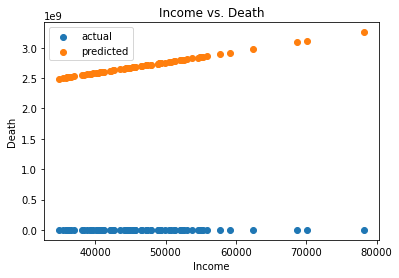

In [29]:
X2 = X_test["Income"]

plt.scatter(X2, y_test, label="actual")
plt.scatter(X2, y_scaler.inverse_transform(model.predict(X_test)), label= "predicted")

plt.legend()

plt.xlabel("Income")
plt.ylabel("Death")
plt.title("Income vs. Death")

plt.savefig("../static/images/IncomevsDeath.png", bbox_inches='tight')

In [30]:
# Score data based on scaled model
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.002888673449178314
Testing Score: -0.0060100540310412676


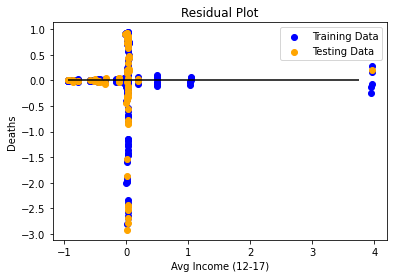

In [16]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.gca().set(xlabel='Avg Income (12-17)', ylabel='Deaths')
# plt.show()

plt.savefig("../static/images/residual_plot.png", bbox_inches='tight')

# plt.show()

In [10]:
# Calculate MSE & R2 
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1569028081427006, R2: -0.00601005403104149
